In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Contents
 - EDA
 - histogram
 - distributions

## # EDA

In [65]:
d = sns.load_dataset('titanic')
print(d.shape)
d.head(2)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [66]:
d['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [67]:
d['class'].value_counts().sort_index()

First     216
Second    184
Third     491
Name: class, dtype: int64

In [68]:
d.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
d.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
d.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

#### replace

In [71]:
d.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [72]:
s_fare = d['fare']
s_fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [73]:
s_fare = s_fare.replace([7.2500, 7.9250], np.nan)
s_fare.head()

0        NaN
1    71.2833
2        NaN
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [74]:
s_fare.replace([71.2833], np.nan, inplace=True)
s_fare.head()

0      NaN
1      NaN
2      NaN
3    53.10
4     8.05
Name: fare, dtype: float64

## # Histogram

In [76]:
d = sns.load_dataset('iris')
d.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


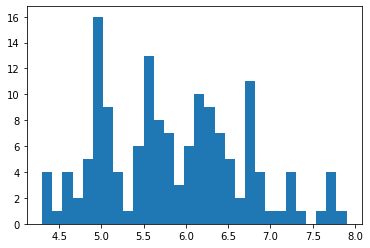

In [77]:
plt.hist(d['sepal_length'].dropna(), bins=30)
plt.show()

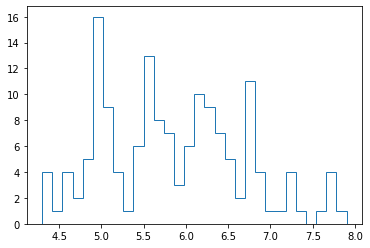

In [79]:
plt.hist(d['sepal_length'].dropna(), bins=30, histtype='step')
plt.show()

#### filtering

In [80]:
is_larger_than_5 = d['sepal_length'] > 5
is_larger_than_5.head(3)

0     True
1    False
2    False
Name: sepal_length, dtype: bool

In [81]:
is_larger_than_5.sum(), is_larger_than_5.mean()

(118, 0.7866666666666666)

In [82]:
# Filtering
len_sep = d['sepal_length']
sep_larger_than_5 = len_sep[is_larger_than_5]
sep_larger_than_5.mean()

6.129661016949153

In [83]:
# Filtering
len_sep = d['sepal_length']
sep_larger_than_5 = len_sep[~is_larger_than_5]
sep_larger_than_5.mean()

4.7875000000000005

In [84]:
# Filtering
len_sep = d['sepal_length']

is_larger_than_5 = d['sepal_length'] > 5
is_smaller_than_6 = d['sepal_length'] < 6

sep_between_5_and_6 = len_sep[is_larger_than_5 & is_smaller_than_6]
sep_larger_than_5_and_6 = len_sep[is_larger_than_5 & ~is_smaller_than_6]
display(
    sep_between_5_and_6.head(5),
    sep_larger_than_5_and_6.head(5)
)

0     5.1
5     5.4
10    5.4
14    5.8
15    5.7
Name: sepal_length, dtype: float64

50    7.0
51    6.4
52    6.9
54    6.5
56    6.3
Name: sepal_length, dtype: float64

In [95]:
sep_between_5_and_6.nunique()

9

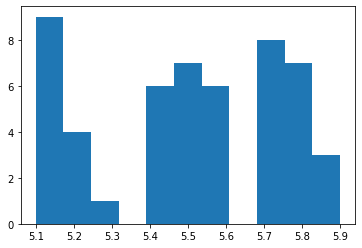

In [99]:
plt.hist(sep_between_5_and_6.dropna(), bins=11)
plt.show()

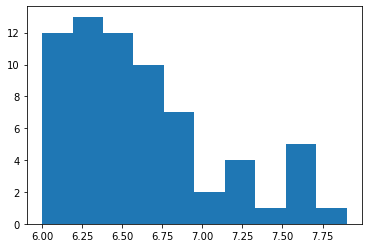

In [91]:
plt.hist(sep_larger_than_5_and_6.dropna(), bins=10)
plt.show()

## # distributions

In [16]:
import pandas as pd
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


/Users/hwan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hwan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


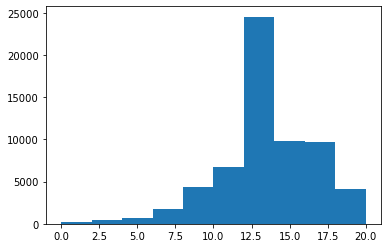

In [17]:
educ = gss['educ']
plt.hist(educ, label='educ')
plt.show()

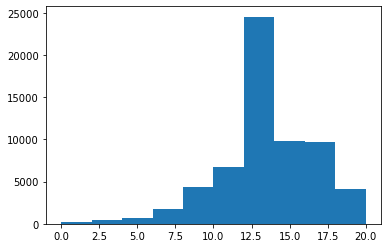

In [18]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

#### PMF

In [19]:
from empiricaldist import Pmf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


In [20]:
gss_2012 = gss[gss['year']==2012]
gss_2012.head(2)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
55087,2012,57.0,1955.0,1,1,12.0,NaN,2.0,NaN,0.823796
55088,2012,29.0,1983.0,1,2,13.0,10412.5,NaN,1.0,1.235694


In [21]:
educ = gss_2012['educ']
educ.head()

55087    12.0
55088    13.0
55089    12.0
55090    12.0
55091    12.0
Name: educ, dtype: float64

In [25]:
pmf_educ = Pmf(educ)
pmf_educ.head()

,probs
55087,12.0
55088,13.0
55089,12.0


#### NG

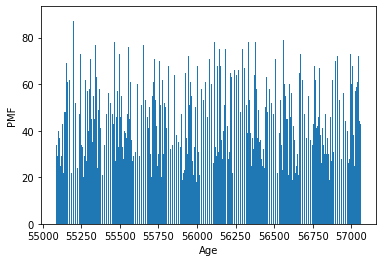

In [26]:
# Select the age column (Series)
age = gss_2012['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

#### a.

In [27]:
age = gss_2012['age']

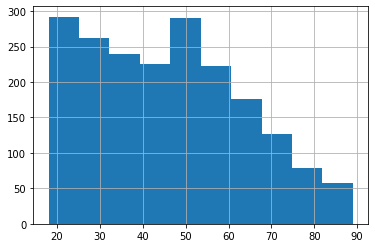

In [31]:
age.hist()

In [35]:
age.values

array([57., 29., 34., ..., 18., 52., 43.])